In [61]:
from scapy.all import *
import scapy.layers.inet as inet
import scapy.utils as utils
import pcapkit as pcapkit
import dpkt as dpkt
import os
import matplotlib.pyplot as plt

#### Jumlah Request dan Response pada Setiap File

In [63]:
total_req = []
total_res = []
total_GET = []
total_POST = []
total_200 = []
total_404 = []

def analyze_http_traffic(pcap_file, packets : PacketList):
    # Membaca file pcap
    
    # Inisialisasi variabel untuk statistik
    req = 0
    res = 0
    req_GET = 0
    req_POST = 0
    res_200 = 0
    res_404 = 0


    # Loop melalui setiap paket dalam file pcap
    for packet in packets:
        # Memeriksa apakah paket merupakan paket HTTP
        if packet.haslayer(inet.TCP) and packet.haslayer(Raw):
            payload = packet[Raw].load.decode('utf-8', 'ignore')

            # Memeriksa apakah paket merupakan permintaan (request) HTTP
            if "HTTP/1." in payload and "GET" in payload:
                req_GET += 1
                req += 1
                
            if "HTTP/1." in payload and "POST" in payload:
                req_POST += 1
                req += 1


            # Memeriksa apakah paket merupakan tanggapan (response) HTTP
            if "HTTP/1." in payload and "200 OK" in payload:
                res_200 += 1
                res += 1
                
            if "HTTP/1." in payload and "404 Not Found" in payload:
                res_404 += 1
                res += 1

    # Menampilkan hasil statistik
    print("Total Request dan Respond pada paket", pcap_file, " : ")
    print("Requests: ", req)
    print("\tGET : ", req_GET)
    print("\tPOST: ", req_POST)
    print("Responses: ", res)
    print("\t200 OK        : ", res_200)
    print("\t404 Not Found : ", res_404)
    
    total_GET.append(req_GET)
    total_POST.append(req_POST)
    total_req.append(req)    
    total_200.append(res_200)
    total_404.append(res_404)
    total_res.append(res)

In [64]:
packages = os.listdir('./Datasets/CICDS_Wednesday/')
 
for pcap_file in packages:
    pkts = utils.rdpcap('./Datasets/CICDS_Wednesday/' + pcap_file)
    analyze_http_traffic(pcap_file, pkts)

Total Request dan Respond pada paket Wednesday_00600_20170705055056.pcap  : 
Requests:  1095
	GET :  1072
	POST:  23
Responses:  136
	200 OK        :  135
	404 Not Found :  1
Total Request dan Respond pada paket Wednesday_00601_20170705055151.pcap  : 
Requests:  495
	GET :  468
	POST:  27
Responses:  60
	200 OK        :  60
	404 Not Found :  0
Total Request dan Respond pada paket Wednesday_00602_20170705055229.pcap  : 
Requests:  624
	GET :  592
	POST:  32
Responses:  32
	200 OK        :  32
	404 Not Found :  0
Total Request dan Respond pada paket Wednesday_00603_20170705055327.pcap  : 
Requests:  122
	GET :  75
	POST:  47
Responses:  47
	200 OK        :  47
	404 Not Found :  0
Total Request dan Respond pada paket Wednesday_00604_20170705055331.pcap  : 
Requests:  330
	GET :  251
	POST:  79
Responses:  85
	200 OK        :  85
	404 Not Found :  0
Total Request dan Respond pada paket Wednesday_00605_20170705055346.pcap  : 
Requests:  352
	GET :  339
	POST:  13
Responses:  33
	200 OK     

In [10]:
print("Total paket Request\t: ", sum(total_req))
print("\tTotal metode GET  : ", sum(total_GET))
print("\tTotal metode POST : ", sum(total_POST))
print("Total paket Response\t: ", sum(total_res))
print("\tTotal pesan 200 OK        : ", sum(total_200))
print("\tTotal pesan 400 Not Found : ", sum(total_404))

Total paket Request	:  123441
	Total metode GET  :  120097
	Total metode POST :  3344
Total paket Response	:  86558
	Total pesan 200 OK        :  86549
	Total pesan 400 Not Found :  9


#### Visualisasi Jumlah Metode dan Pesan

In [13]:
jml_GET = sum(total_GET)
jml_POST = sum(total_POST)
jml_200 = sum(total_200)
jml_404 = sum(total_404)

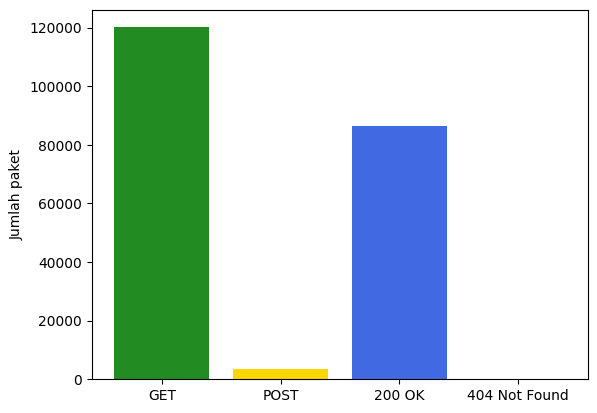

In [16]:
fig, ax = plt.subplots()

lab = ['GET', 'POST', '200 OK', '404 Not Found']
counts = [jml_GET, jml_POST, jml_200, jml_404]
bar_colors = ['forestgreen', 'gold', 'royalblue', 'crimson']

ax.bar(lab, counts, color=bar_colors)

ax.set_ylabel('Jumlah paket')

plt.show()


#### Visualisasi Perbandingan Total Request dan Response

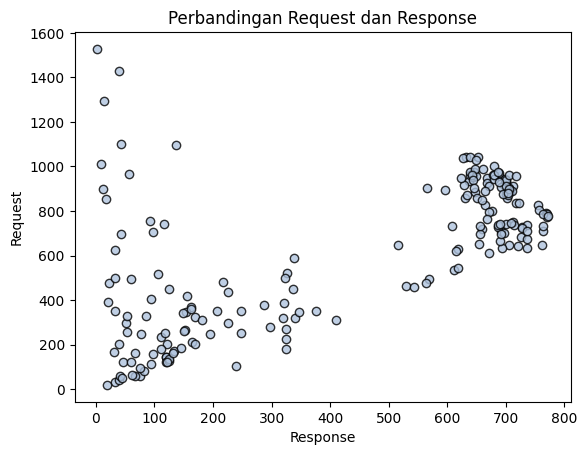

In [51]:
plt.scatter(total_res, total_req, edgecolor ='k', alpha=0.8, c='lightsteelblue')
plt.title('Perbandingan Request dan Response')
plt.xlabel('Response')
plt.ylabel('Request')
plt.show()

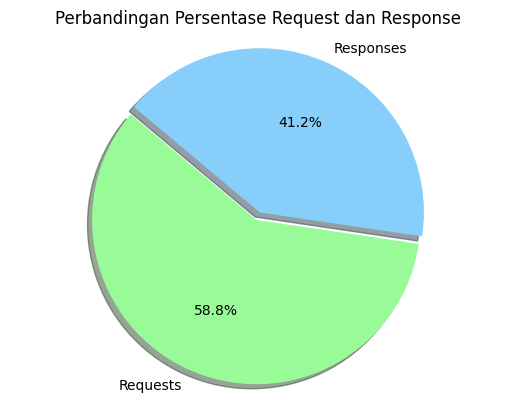

In [52]:
sizes = [sum(total_req), sum(total_res)]
colors = ['palegreen', 'lightskyblue']
labels = ['Requests', 'Responses']

explode = (0.05, 0)

# Membuat pie chart menggunakan matplotlib
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title('Perbandingan Persentase Request dan Response')
plt.show()

#### Visualisasi Total Request 

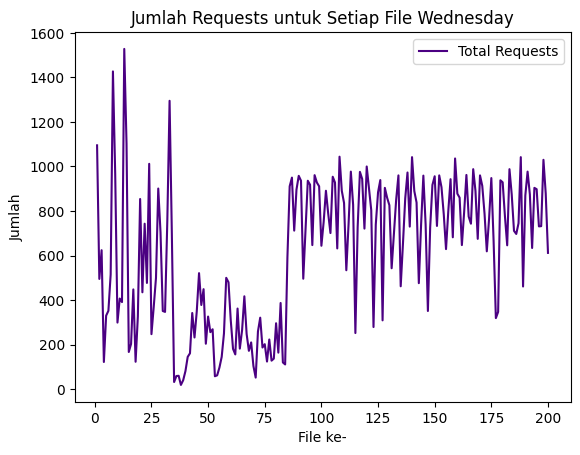

In [30]:
n = range(1, 201)

plt.plot(n, total_req, linestyle='-', color='indigo', label='Total Requests')

plt.title('Jumlah Requests untuk Setiap File Wednesday')
plt.xlabel('File ke-')
plt.ylabel('Jumlah')

plt.legend()

plt.show()

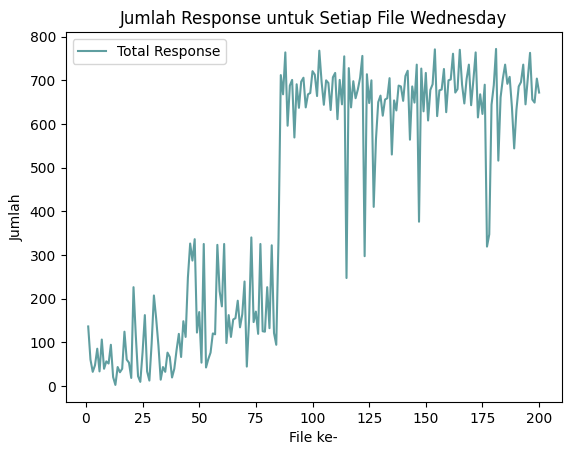

In [49]:
plt.plot(n, total_res, linestyle='-', color='cadetblue', label='Total Response')

plt.title('Jumlah Response untuk Setiap File Wednesday')
plt.xlabel('File ke-')
plt.ylabel('Jumlah')

plt.legend()

plt.show()

In [73]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Line, Pie, Tab

#Lab Count
lab = ['GET', 'POST', '200 OK', '404 Not Found']
counts = [jml_GET, jml_POST, jml_200, jml_404]

bar = (
    Bar()
    .add_xaxis(lab)
    .add_yaxis("Jumlah paket", counts, itemstyle_opts=opts.ItemStyleOpts(color='#5470c6'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Jumlah Metode dan Pesan', subtitle='Bar'),
        yaxis_opts=opts.AxisOpts(name="Jumlah paket"),
    )
)



#Line
n = list(range(1, 201))

line_chart = (
    Line()
    .add_xaxis(n)
    .add_yaxis('Total Requests', total_req, linestyle_opts=opts.LineStyleOpts(color='#4b0082'))
    .add_yaxis('Total Response', total_res, linestyle_opts=opts.LineStyleOpts(color='#5f9ea0'))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Jumlah Request & Response Setiap File Wednesday', subtitle='Line'),
        xaxis_opts=opts.AxisOpts(name='File ke-'),
        yaxis_opts=opts.AxisOpts(name='Jumlah'),
        legend_opts=opts.LegendOpts(),
        datazoom_opts=opts.DataZoomOpts(),
    )
)


#Bar
bar_chart = (
    Bar()
    .add_xaxis(n)
    .add_yaxis("Jumlah Requests", total_req, color='#4b0082')
    .add_yaxis("Jumlah Response", total_res, color='#5f9ea0')
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Jumlah Request & Response Setiap File Wednesday', subtitle='Bar'),
        xaxis_opts=opts.AxisOpts(name='File ke-'),
        yaxis_opts=opts.AxisOpts(name='Jumlah'),
        datazoom_opts=opts.DataZoomOpts(),
    )
)


sizes = [sum(total_req), sum(total_res)]
colors = ['#98fb98', '#87cefa']
labels = ['Requests', 'Responses']

# Membuat objek Pie chart
pie_chart = (
    Pie()
    .add("", [list(z) for z in zip(labels, sizes)], radius=["30%", "75%"], center=["50%", "50%"], rosetype="radius",
         label_opts=opts.LabelOpts(is_show=False, position="center"))
    .set_colors(colors)
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Perbandingan Persentase Request dan Response', subtitle='Pie'),
        legend_opts=opts.LegendOpts(is_show=True, orient="vertical", pos_top="15%", pos_left="2%"),
    )
)

# Menampilkan chart
#

#Tab
tab = Tab(page_title='Visualisasi Jumlah Requests dan Response untuk Setiap File Wednesday')
tab.add(bar, "Label Counts")
tab.add(bar_chart, "Bar")
tab.add(line_chart, "Line")
tab.add(pie_chart, "Pie")
tab.render('Visualisasi Jumlah Request & Response Setiap File Wednesday.html')

'c:\\Users\\Salma Nabila\\Documents\\semester 3\\praktikum komunikasi data dan jaringan komputer\\DDoS-Attack-Detection-master\\Visualisasi Jumlah Request & Response Setiap File Wednesday.html'